In [1]:
#感知机

In [3]:
#XOR(异或)问题 当x y 相同 分为-1(0)类 ，当x,y符号相反，分为正1类 ，感知机只能产生线性分割面

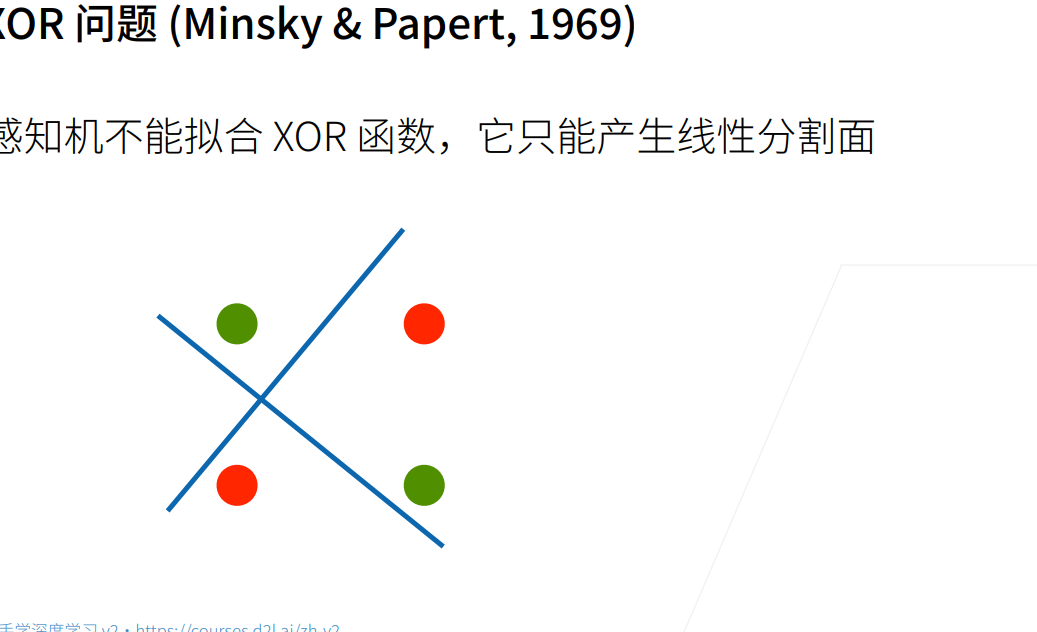

In [4]:
#多层感知机

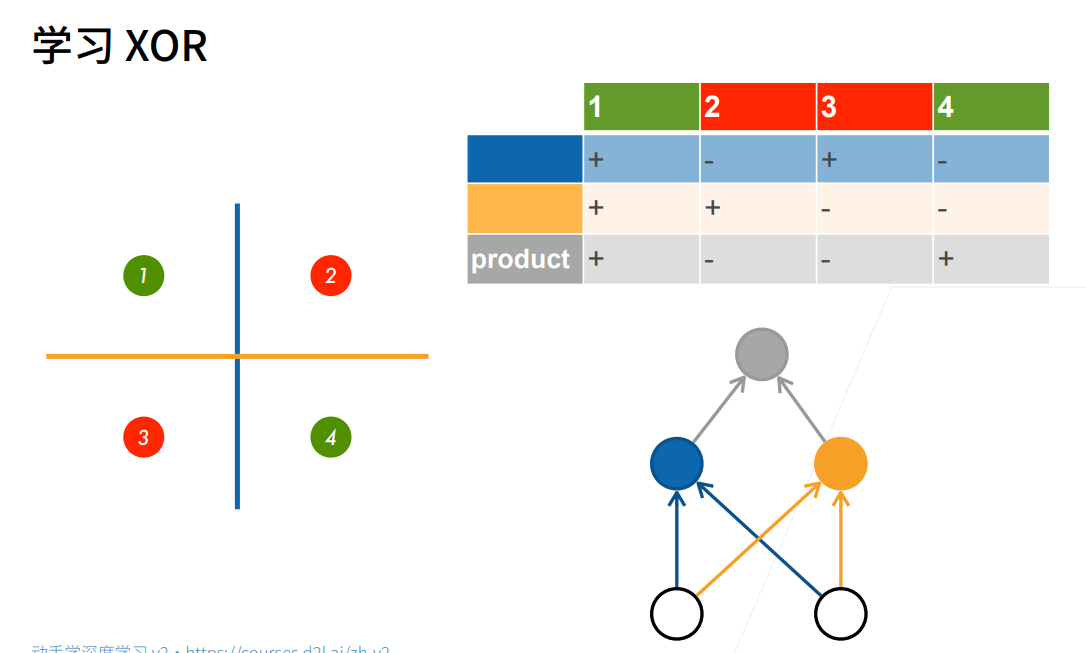

In [6]:
#多层感知机 处理XOR，先生成两个分类器(蓝色，黄色)，之后在对它们的结果分类(灰色分类器)

In [7]:
#多层感知机总计：
                #多层感知机使用隐藏层和激活函数来得到非线性模型
                #常用的激活函数又Sigmoid，Tanh, ReLU
                #使用Softmax来处理多分类
                #超参数为隐藏层数，各个隐藏层的大小

多层感知机从0开始实现

In [46]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256 
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [17]:
#初始化模型参数 实现一个具有单隐藏层的多层感知机
num_inputs, num_outputs, num_hiddens =784, 10 ,256

W1= nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True)*0.01)
b1= nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2= nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True)*0.01)
b2= nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [23]:
#激活函数
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X,a)

In [25]:
#模型
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1+b1) #矩阵乘法 同torch.matmul等效
    return (H@W2+b2) 

In [26]:
#损失函数 （softmax后计算交叉熵损失）
loss = nn.CrossEntropyLoss(reduction='none') #reduction='none' 表示不进行任何损失值的汇总或平均操作

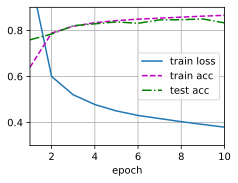

In [28]:
num_epochs, lr = 10,0.1
updater = torch.optim.SGD(params, lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)


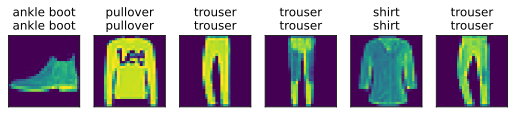

In [29]:
d2l.predict_ch3(net, test_iter) #预测


In [47]:
#多层感知机的简洁实现

net = nn.Sequential(nn.Flatten(),#展平 , 图片数据变成二维输入
                    nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        
net.apply(init_weight)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

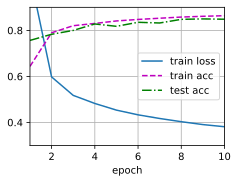

In [48]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr = lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)